In [63]:
# Import Dependencies
import requests
import json

# Define the API key
api_key = "llhq7n5rh6"

# Import pprint
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas

In [65]:
url = "https://api.ebird.org/v2/data/obs/AU/recent?back=30"
payload={}
headers = {
  'X-eBirdApiToken': api_key
}
response = requests.request("GET", url, headers=headers, data=payload).json()
pprint(response)

[{'comName': 'Australian Ibis',
  'howMany': 8,
  'lat': -33.838293,
  'lng': 148.685286,
  'locId': 'L4004605',
  'locName': 'Lachlan River at Carob Bean Avenue, Cowra',
  'locationPrivate': False,
  'obsDt': '2024-06-13 16:22',
  'obsReviewed': False,
  'obsValid': True,
  'sciName': 'Threskiornis molucca',
  'speciesCode': 'ausibi1',
  'subId': 'S181144656'},
 {'comName': 'Blue-faced Honeyeater',
  'howMany': 1,
  'lat': -33.838293,
  'lng': 148.685286,
  'locId': 'L4004605',
  'locName': 'Lachlan River at Carob Bean Avenue, Cowra',
  'locationPrivate': False,
  'obsDt': '2024-06-13 16:22',
  'obsReviewed': False,
  'obsValid': True,
  'sciName': 'Entomyzon cyanotis',
  'speciesCode': 'blfhon1',
  'subId': 'S181144656'},
 {'comName': 'Superb Fairywren',
  'howMany': 2,
  'lat': -33.838293,
  'lng': 148.685286,
  'locId': 'L4004605',
  'locName': 'Lachlan River at Carob Bean Avenue, Cowra',
  'locationPrivate': False,
  'obsDt': '2024-06-13 16:22',
  'obsReviewed': False,
  'obsValid

In [66]:
obs_no = (len(response))
print(f"Number of observations in dataset: {obs_no}")

Number of observations in dataset: 697


In [67]:
#Convert the dataset into a pandas dataframe
birds_df = pd.DataFrame(response)

In [68]:
#Print the first 10 rows
birds_df.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,ausibi1,Australian Ibis,Threskiornis molucca,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,8.0,-33.838293,148.685286,True,False,False,S181144656,NaN
1,blfhon1,Blue-faced Honeyeater,Entomyzon cyanotis,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN
2,supfai1,Superb Fairywren,Malurus cyaneus,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN
3,succoc,Sulphur-crested Cockatoo,Cacatua galerita,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN
4,wilwag1,Willie-wagtail,Rhipidura leucophrys,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN


In [69]:
#Print column names, data types
column_names = birds_df.columns
print(f"Columns in dataset are: {column_names}")

print(birds_df.describe())

Columns in dataset are: Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'exoticCategory'],
      dtype='object')
          howMany         lat         lng
count  682.000000  697.000000  697.000000
mean     3.760997  -27.887657  141.786296
std      6.698460    9.298242   10.900889
min      1.000000  -43.389269  113.707006
25%      1.000000  -34.671939  135.264040
50%      2.000000  -29.399942  145.325458
75%      3.000000  -17.977100  149.440504
max     60.000000   -9.347823  159.250560


In [70]:
#%%capture --no-display

# Configure the map plot
obs_map = birds_df.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    size = "howMany",
    frame_width = 800,
    frame_height = 600,
    color = "comName",
    alpha = 0.5
)


# Display the map
obs_map = birds_df.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    size = "howMany",
    frame_width = 800,
    frame_height = 600,
    color = "comName",
    alpha = 0.5
)

# Display the map
obs_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lng,lat]   (comName,howMany)

In [71]:
# seperate the bird sighting per state from the map
state_birds = birds_df.groupby("locName").count()["comName"].sort_values(ascending = False)
state_birds.head(10)

locName
Tasman Sea, Cape Pillar AU-TAS (-43.1992,148.2331)                                               14
Lachlan River at Carob Bean Avenue, Cowra                                                        14
Unnamed Road, Boomi, New South Wales, AU (-28.676, 149.441)Koramba, Sth Front, Sth Perimiter.    10
Charles Eaton Dr, Marrara AU-NT -12.39984, 130.87497                                             10
2568, Menangle AU-NSW (-34.1277,150.7113)                                                        10
Mangroves near Orchard Rd (Coconut Grove)                                                         9
Lock 9, Murray River                                                                              9
Palmers Channel North Bank Rd, Palmers Island                                                     9
Hogwash Bend                                                                                      8
Surrey Rd                                                                                   

In [116]:
# total number of observations
birds_df["comName"].nunique()

697

In [73]:
birds_df["locName"].nunique()

396

In [74]:
location_counts = pd.DataFrame(birds_df["locName"].value_counts()).reset_index()
location_counts

,locName,count
0,"Tasman Sea, Cape Pillar AU-TAS (-43.1992,148.2...",14
1,"Lachlan River at Carob Bean Avenue, Cowra",14
2,"Unnamed Road, Boomi, New South Wales, AU (-28....",10
3,"2568, Menangle AU-NSW (-34.1277,150.7113)",10
4,"Charles Eaton Dr, Marrara AU-NT -12.39984, 130...",10
...,...,...
391,LHI25--Balls Pyramid Pelagic,1
392,"11 Kerr Point Dr, Mission River AU-QLD -12.665...",1
393,"Warri Park Wetland, Port Douglas Rd, Port Douglas",1
394,Eungella National Park--Diggings Rd,1


In [75]:
#Merge Location Counts df with birds_df to get lat and long for each location
birds_locatoin_df = pd.merge(birds_df, location_counts, how = 'inner', on = "locName")
birds_locatoin_df

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory,count
0,ausibi1,Australian Ibis,Threskiornis molucca,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,8.0,-33.838293,148.685286,True,False,False,S181144656,NaN,14
1,blfhon1,Blue-faced Honeyeater,Entomyzon cyanotis,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN,14
2,supfai1,Superb Fairywren,Malurus cyaneus,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN,14
3,succoc,Sulphur-crested Cockatoo,Cacatua galerita,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN,14
4,wilwag1,Willie-wagtail,Rhipidura leucophrys,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,grbhon1,Green-backed Honeyeater,Glycichaera fallax,L2038367,Kutini-Payamu (Iron Range) National Park,2024-05-18 07:00,5.0,-12.659014,143.347378,True,False,False,S176438326,NaN,3
693,yebkin1,Yellow-billed Kingfisher,Syma torotoro,L2038367,Kutini-Payamu (Iron Range) National Park,2024-05-18 07:00,3.0,-12.659014,143.347378,True,False,False,S176438326,NaN,3
694,nosrob1,Northern Scrub-Robin,Drymodes superciliaris,L2038367,Kutini-Payamu (Iron Range) National Park,2024-05-18 07:00,2.0,-12.659014,143.347378,True,False,False,S176438326,NaN,3
695,sccpar1,Scarlet-chested Parrot,Neophema splendida,L31875841,"6431, Plumridge Lakes AU-WA (-29.4746,124.4909)",2024-05-17 12:40,2.0,-29.474602,124.490901,True,False,True,S175031406,NaN,1


In [114]:
top_ten_locations = birds_locatoin_df.locName.value_counts().nlargest(10)

top_ten_locations_df.hvplot.bar(
    x = "locName",
    y = "count",  # change this to a column that contains numerical data
    title = "Top 10 Bird Observing Locations in Australia",
    xlabel = "Location",
    ylabel = "Number of Observations",
    rot = 90,
    height = 800,
    width = 800
)

:Bars   [locName]   (count)

In [80]:
# fetch the historical observation data of 2020
url = "https://api.ebird.org/v2/data/obs/AU/recent?back=30"
payload={}
headers = {
  'X-eBirdApiToken': api_key
}
response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
else:
    print(f"Error: {response.status_code} - {response.text}")
    
  
# Convert the data into a pandas dataframe
birds_df = pd.DataFrame(data)
birds_df.head()


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,ausibi1,Australian Ibis,Threskiornis molucca,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,8.0,-33.838293,148.685286,True,False,False,S181144656,NaN
1,blfhon1,Blue-faced Honeyeater,Entomyzon cyanotis,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN
2,supfai1,Superb Fairywren,Malurus cyaneus,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN
3,succoc,Sulphur-crested Cockatoo,Cacatua galerita,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN
4,wilwag1,Willie-wagtail,Rhipidura leucophrys,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN


In [81]:
# scatter plot of last 30 days obseravions for top 10 species by location
top_ten_species = birds_df["comName"].value_counts().nlargest(10).index.tolist()
top_ten_species_df = birds_df[birds_df["comName"].isin(top_ten_species)]
top_ten_species_df.head()


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,ausibi1,Australian Ibis,Threskiornis molucca,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,8.0,-33.838293,148.685286,True,False,False,S181144656,NaN
1,blfhon1,Blue-faced Honeyeater,Entomyzon cyanotis,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN
2,supfai1,Superb Fairywren,Malurus cyaneus,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN
3,succoc,Sulphur-crested Cockatoo,Cacatua galerita,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,2.0,-33.838293,148.685286,True,False,False,S181144656,NaN
4,wilwag1,Willie-wagtail,Rhipidura leucophrys,L4004605,"Lachlan River at Carob Bean Avenue, Cowra",2024-06-13 16:22,1.0,-33.838293,148.685286,True,False,False,S181144656,NaN


In [82]:
# bar chart of top 10 species by location observed in the last 30 days
top_ten_species_df.hvplot.bar(
    x = "comName",
    y = "howMany",
    title = "Top 10 Bird Species Observed in the Last 30 Days",
    xlabel = "Species",
    ylabel = "Number of Observations",
    rot = 45,
    height = 400,
    width = 800
)

:Bars   [comName]   (howMany)

In [83]:
# Fetch the list of states in Australia
states_url = 'https://api.ebird.org/v2/ref/region/list/subnational1/AU.json'
states_response = requests.get(states_url, headers=headers)
states = states_response.json()

# For each state, fetch the bird data
for state in states:
    state_code = state['code']
    bird_data_url = f'https://api.ebird.org/v2/data/obs/{state_code}/recent?back=30'
    bird_data_response = requests.get(bird_data_url, headers=headers)
    if bird_data_response.status_code == 200:
        bird_data = bird_data_response.json()
    else:
        print(bird_data_response.status_code)
        print(bird_data_response.text)
    

In [85]:
# list of states
states_list = [state['code'] for state in states]
states_list

['AU-ACT', 'AU-NSW', 'AU-NT', 'AU-QLD', 'AU-SA', 'AU-TAS', 'AU-VIC', 'AU-WA']

In [86]:
# create a dictionary to store the bird data for each state
birds_data = {}
for state in states:
    state_code = state['code']
    bird_data_url = f'https://api.ebird.org/v2/data/obs/{state_code}/recent?back=30'
    bird_data_response = requests.get(bird_data_url, headers=headers)
    if bird_data_response.status_code == 200:
        bird_data = bird_data_response.json()
        birds_data[state_code] = bird_data
    else:
        print(bird_data_response.status_code)
        print(bird_data_response.text)
        


In [87]:

state_counts = {}
for state in birds_data.keys():
    state_counts[state] = len(birds_data[state])
    
state_counts_df = pd.DataFrame.from_dict(state_counts, orient='index', columns=['Observations'])
state_counts_df.reset_index(inplace=True)
state_counts_df.rename(columns={'index': 'State'}, inplace=True)
state_counts_df


,State,Observations
0,AU-ACT,162
1,AU-NSW,410
2,AU-NT,317
3,AU-QLD,497
4,AU-SA,305
5,AU-TAS,186
6,AU-VIC,317
7,AU-WA,410


In [88]:
# bar chart of bird observations by state
state_counts_df.hvplot.bar(
    x = "State",
    y = "Observations",
    title = "Bird Observations by State in the Last 30 Days",
    xlabel = "State",
    ylabel = "Number of Observations",
    rot = 45,
    height = 400,
    width = 800,
    color = "red" 
)

:Bars   [State]   (Observations)

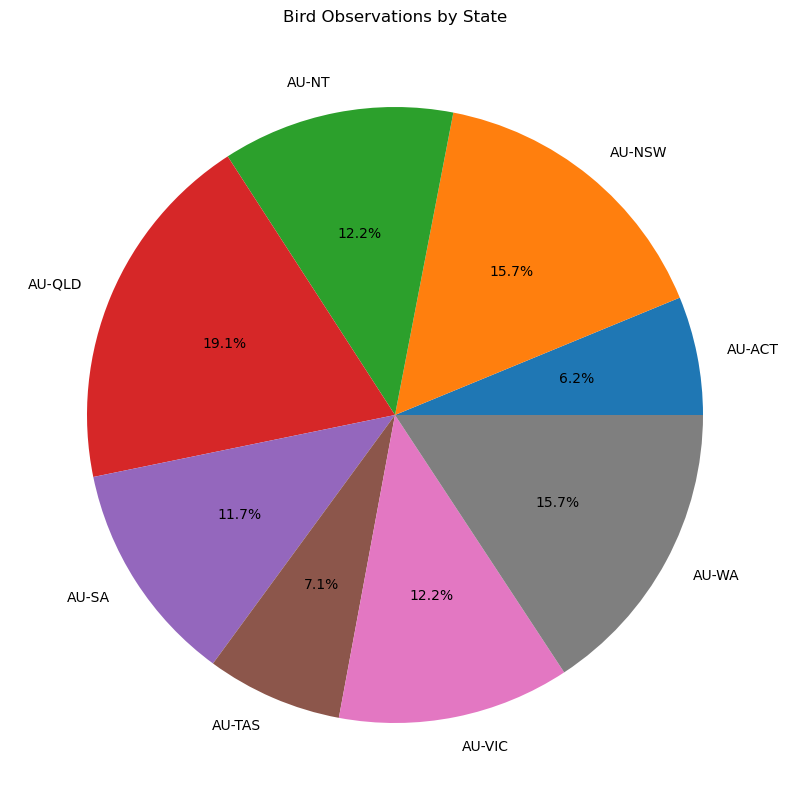

In [101]:
import matplotlib.pyplot as plt

# Assuming state_counts_df is your DataFrame and it has a column 'Observations' with counts of bird observations for each 'State'
data = state_counts_df.set_index('State')['Observations']

plt.figure(figsize=(10,10))
plt.pie(data, labels = data.index, autopct='%1.1f%%')
plt.title('Bird Observations by State')
plt.show()